In [1]:
import gym
import gym_md
# import gym
# from gym_md.helper.policy_wrapper import PolicyWapper
from pprint import pprint
from util import debug_env



In [2]:
config= {
    "action_type": "path",
    "action_space_type": "box",
    "obs_type": "grid",
    "base_path":  "./play_style_models/base/", 
}

env =gym.make("md-switch-policy_2", config = config)

# debug_env(env)
print(env.action_space.sample())
print(env.observation_space.sample())

/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/envs/registration.py:563: UserWarning: WARN: Using the latest versioned environment `md-switch-policy_2-v0` instead of the unversioned environment `md-switch-policy_2`.
  logger.warn(
2023-11-06 14:49:17.197696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


{'action_type': 'path', 'action_space_type': 'box', 'obs_type': 'grid', 'base_path': './play_style_models/base/'}
[ 0.9409369   0.2146585   0.25886825  0.88891894 -0.22505799 -0.0195769
 -0.11953229]
[[749 533 501 164  70 194 319 762 287 165 585 434 991  49 581 579 524 274
  790 164 438]
 [647  62 303 762  42 764 924 328 334 428  47 187 825 524 517 566 961 123
  437  18 376]
 [718 223 707 790 689 920 956 701 980 806 871 496 464 977  77 827 731 867
  909 820 763]
 [ 98 718 851 735 736 279 541 662 280 374  13 173 506 423 897 193  16 124
  169 148 422]
 [  7 266 431 874 599 491 992 775 237 840 622 700 776 142 653 170 614 290
  749 430 830]]


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 21)
  logger.warn(


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_check

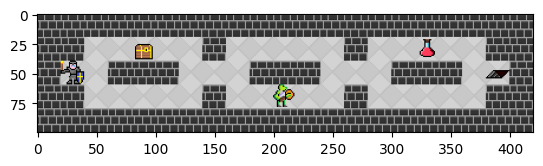

/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


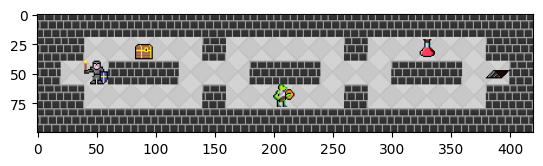

-2.0


<Figure size 640x480 with 0 Axes>

In [3]:
LOOP: int = 2
TRY_OUT: int = 1
import random

for _ in range(TRY_OUT):
    observation = env.reset()
    reward_sum = 0
    for i in range(LOOP):
        output_image = env.render(mode='human')
        actions = env.action_space.sample()
        # actions = []
        # c_1actions = [0.98,0.0,1.0,0.99,0.0,0.0,0.95]
        # direction action input
        # DIRECTIONAL_ACTIONS = ["UP", "DOWN", "LEFT", "RIGHT"]
        c_1actions = [1.0, 0.0, 0.0, 0.0] 
        # print(actions)
        # pprint(env.grid.g)

        observation, reward, done, info = env.step(actions)
        # print(observation)

        # print(actions, observation, reward, done, info)

        reward_sum += reward

        if done:
            env.render()
            break

    print(reward_sum)

In [20]:
policies = PolicyWapper(path='./play_style_models/base/')
# obs = [4, 4, 4, 6, 6, 8, 8, 500]
# obs = [4, 4, 12, 4, 12, 8, 15, 500]
obs = [11, 3, 3, 19, 19, 23, 23, 100]


In [23]:

print(policies)
print(policies.wrapped_models)
print(policies.policy_names)
treasure_pred = policies.wrapped_models['TREASURE'].predict(obs, deterministic=False)[0]
killer_pred = policies.wrapped_models['KILLER'].predict(obs, deterministic=False)[0]
potion_pred = policies.wrapped_models['POTION'].predict(obs, deterministic=False)[0]
runner_pred = policies.wrapped_models['RUNNER'].predict(obs, deterministic=False)[0]

print(treasure_pred)
print(killer_pred)
print(potion_pred)
print(runner_pred)


{'KILLER': <stable_baselines3.ppo.ppo.PPO object at 0x7f6ddd9ae220>, 'TREASURE': <stable_baselines3.ppo.ppo.PPO object at 0x7f6ddd9702e0>, 'RUNNER': <stable_baselines3.ppo.ppo.PPO object at 0x7f6ddd6f4d90>, 'POTION': <stable_baselines3.ppo.ppo.PPO object at 0x7f6ddd68dee0>}
['KILLER', 'TREASURE', 'RUNNER', 'POTION']
[ 0.1483813   1.          1.         -0.7119144   0.09395188  0.11650401
 -0.38813698]
[ 0.5539112  -1.         -1.         -1.         -0.2067461   0.07589275
  0.35843295]
[-1.         -1.         -0.75475824  1.          1.         -0.1758936
 -1.        ]
[-1.          0.61616397  0.3013966   1.         -0.38997367 -0.7225011
  1.        ]


In [17]:
from typing import List,Tuple
actions_idx: List[Tuple[float, int]] = [(treasure_pred[i], i) for i in range(len(treasure_pred))]
print(treasure_pred)
print(actions_idx)
actions_idx.sort(key=lambda z: (-z[0], -z[1]))
max_value = max(treasure_pred)
print(actions_idx)
print(max_value)

actions_idx: List[Tuple[float, int]] = [(runner_pred[i], i) for i in range(len(runner_pred))]
print(runner_pred)
print(actions_idx)
actions_idx.sort(key=lambda z: (-z[0], -z[1]))
max_value = max(runner_pred)
print(actions_idx)
print(max_value)

actions_idx: List[Tuple[float, int]] = [(potion_pred[i], i) for i in range(len(potion_pred))]
print(potion_pred)
print(actions_idx)
actions_idx.sort(key=lambda z: (-z[0], -z[1]))
max_value = max(potion_pred)
print(actions_idx)
print(max_value)

[-1.         -0.9377869   0.9982467   0.30676934  1.         -0.45704693
  0.94562495]
[(-1.0, 0), (-0.9377869, 1), (0.9982467, 2), (0.30676934, 3), (1.0, 4), (-0.45704693, 5), (0.94562495, 6)]
[(1.0, 4), (0.9982467, 2), (0.94562495, 6), (0.30676934, 3), (-0.45704693, 5), (-0.9377869, 1), (-1.0, 0)]
1.0
[ 1.          0.50880104 -1.          1.          1.          0.16606605
  1.        ]
[(1.0, 0), (0.50880104, 1), (-1.0, 2), (1.0, 3), (1.0, 4), (0.16606605, 5), (1.0, 6)]
[(1.0, 6), (1.0, 4), (1.0, 3), (1.0, 0), (0.50880104, 1), (0.16606605, 5), (-1.0, 2)]
1.0
[ 0.28381863 -1.          0.90259975 -1.          0.1825525   0.3496265
 -0.1585179 ]
[(0.28381863, 0), (-1.0, 1), (0.90259975, 2), (-1.0, 3), (0.1825525, 4), (0.3496265, 5), (-0.1585179, 6)]
[(0.90259975, 2), (0.3496265, 5), (0.28381863, 0), (0.1825525, 4), (-0.1585179, 6), (-1.0, 3), (-1.0, 1)]
0.90259975


In [26]:
print(policies.wrapped_models['TREASURE'].predict(obs, deterministic=True)[0])
print(policies.wrapped_models['TREASURE'].predict(obs, deterministic=False)[0])
# killer_pred = policies.wrapped_models['TREASURE'].predict(obs, deterministic=False)[0]
# potion_pred = policies.wrapped_models['TREASURE'].predict(obs, deterministic=False)[0]
# runner_pred = policies.wrapped_models['TREASURE'].predict(obs, deterministic=False)[0]

# print(treasure_pred)
# print(killer_pred)
# print(potion_pred)
# print(runner_pred)

[-0.6306631   0.8397609   0.99968743 -0.57672924 -0.5783586  -0.5133032
 -0.49990606]
[-1.          1.          1.         -0.7308615   0.78495556  1.
 -0.7370953 ]


In [1]:
import gym
import gym_md
# import gym
# from gym_md.helper.policy_wrapper import PolicyWapper
from pprint import pprint
from util import debug_env
env =gym.make('md-switch-policy_2',action_type='policy')
action_type = 'policy'

/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/envs/registration.py:563: UserWarning: WARN: Using the latest versioned environment `md-switch-policy_2-v0` instead of the unversioned environment `md-switch-policy_2`.
  logger.warn(
2023-10-05 13:44:58.808351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
debug_env(env)

# print(env.env.env.grid)

Env Info:
{'action_space': Discrete(4),
 'action_type': 'policy',
 'agent': <gym_md.envs.agent.policy_agent.PolicyAgent object at 0x7f9426970790>,
 'debug': True,
 'grid': <gym_md.envs.grid.Grid object at 0x7f951c06cd30>,
 'info': defaultdict(<class 'int'>, {}),
 'n_actions': 4,
 'observation_space': Box(0, 1000, (8,), int32),
 'random': <random.Random object at 0xb944e40>,
 'renderer': <gym_md.envs.renderer.renderer.Renderer object at 0x7f9426970700>,
 'renderer1': <gym_md.envs.renderer.renderer.Renderer object at 0x7f9426970850>,
 'setting': <gym_md.envs.setting.Setting object at 0x7f94df98cd30>,
 'space_type': 'disc',
 'spec': EnvSpec(id='md-switch-policy_2-v0', entry_point='gym_md.envs:PolicySwitch2MdEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'action_type': 'policy'}, namespace=None, name='md-switch-policy_2', version=0),
 'stage_name': 'policy_2'

/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_check

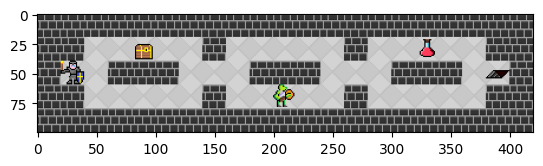

1
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
1 [11  3  3 19 19 23 23 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'TREASURE', 'TREASURE': 1, '.': 1})


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


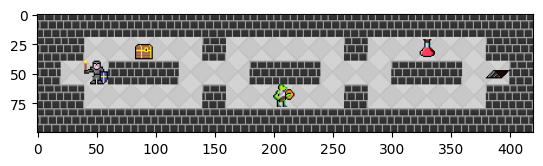

3
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 6, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
3 [10  4  4 18 18 22 22 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'POTION', 'TREASURE': 1, '.': 2, 'POTION': 1})


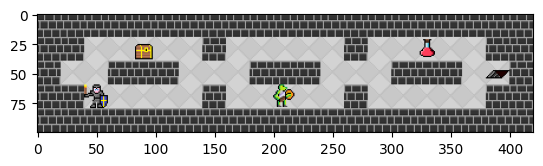

3
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 6, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
3 [ 9  5  5 17 17 21 21 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'POTION', 'TREASURE': 1, '.': 3, 'POTION': 2})


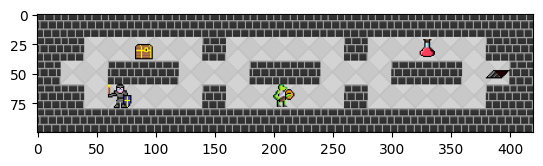

3
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 6, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
3 [ 8  6  6 16 16 20 20 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'POTION', 'TREASURE': 1, '.': 4, 'POTION': 3})


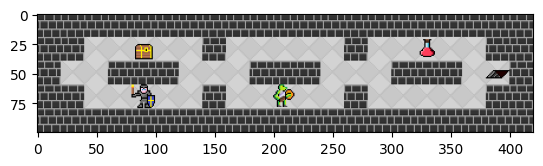

1
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 6, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
1 [ 7  5  5 15 15 19 19 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'TREASURE', 'TREASURE': 2, '.': 5, 'POTION': 3})


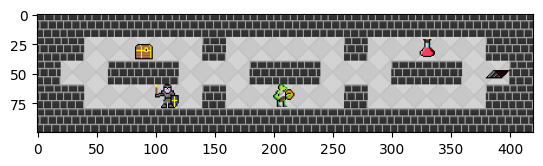

0
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 0, 6, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
0 [ 6  4  4 14 14 18 18 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'KILLER', 'TREASURE': 2, '.': 6, 'POTION': 3, 'KILLER': 1})


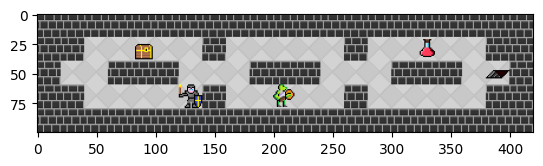

0
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 0, 0, 6, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
0 [ 5  3  3 13 13 17 17 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'KILLER', 'TREASURE': 2, '.': 7, 'POTION': 3, 'KILLER': 2})


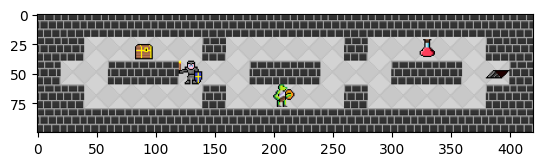

1
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 6, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
1 [ 6  2  2 14 14 18 18 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'TREASURE', 'TREASURE': 3, '.': 8, 'POTION': 3, 'KILLER': 2})


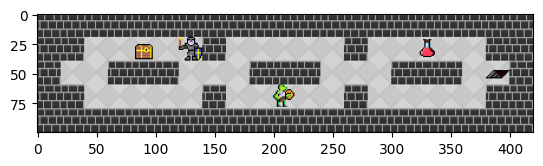

3
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 6, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
3 [ 5  3  3 13 13 17 17 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'POTION', 'TREASURE': 3, '.': 9, 'POTION': 4, 'KILLER': 2})


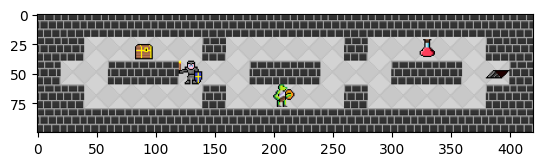

0
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 1, 6, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 5, 1],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
0 [ 4  4  4 12 12 16 16 30] -1.0 False defaultdict(<class 'int'>, {'action_taken': 'KILLER', 'TREASURE': 3, '.': 10, 'POTION': 4, 'KILLER': 3})
-10.0


<Figure size 640x480 with 0 Axes>

In [3]:
LOOP: int = 10
TRY_OUT: int = 1
import random

for _ in range(TRY_OUT):
    observation = env.reset()
    reward_sum = 0
    for i in range(LOOP):
        output_image = env.render(mode='human')
        actions = env.action_space.sample()
        # actions = []
        # c_1actions = [0.98,0.0,1.0,0.99,0.0,0.0,0.95]
        # direction action input
        # DIRECTIONAL_ACTIONS = ["UP", "DOWN", "LEFT", "RIGHT"]
        c_1actions = [1.0, 0.0, 0.0, 0.0] 
        print(actions)
        pprint(env.grid.g)

        observation, reward, done, info = env.step(actions)

        print(actions, observation, reward, done, info)

        reward_sum += reward

        if done:
            env.render()
            break

    print(reward_sum)

In [4]:
debug_env(env)


Env Info:
{'action_space': Discrete(4),
 'action_type': 'policy',
 'agent': <gym_md.envs.agent.policy_agent.PolicyAgent object at 0x7f25487d96a0>,
 'debug': True,
 'grid': <gym_md.envs.grid.Grid object at 0x7f2626ed1910>,
 'info': defaultdict(<class 'int'>,
                     {'.': 10,
                      'KILLER': 2,
                      'POTION': 3,
                      'TREASURE': 5,
                      'action_taken': 'TREASURE'}),
 'n_actions': 4,
 'observation_space': Box(0, 1000, (8,), int32),
 'random': <random.Random object at 0xb4e9ca0>,
 'renderer': <gym_md.envs.renderer.renderer.Renderer object at 0x7f25487d9610>,
 'renderer1': <gym_md.envs.renderer.renderer.Renderer object at 0x7f25487d9760>,
 'setting': <gym_md.envs.setting.Setting object at 0x7f2601762040>,
 'space_type': 'disc',
 'spec': EnvSpec(id='md-switch-policy_1-v0', entry_point='gym_md.envs:PolicySwitch1MdEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, auto

1


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/envs/registration.py:563: UserWarning: WARN: Using the latest versioned environment `md-switch-policy_2-v0` instead of the unversioned environment `md-switch-policy_2`.
  logger.warn(


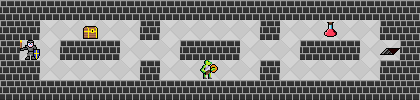

In [6]:
env =gym.make('md-switch-policy_2',action_type='policy')
print(env.action_space.sample())
env.generate(mode='human')
